In [8]:
# !pip install opencv-python --upgrade
# !pip install -r requirements.txt
import pytesseract
import io
import matplotlib.pyplot as plt
from IPython.display import clear_output, Image, display
import cv2 #opencv-python
from PIL import Image #pillow
import warnings
warnings.filterwarnings('ignore')
print(Image.__version__)

# from keras.applications.vgg16 import VGG16
import tensorflow as tf
from keras.applications import VGG19
from keras.applications import imagenet_utils
from tensorflow.keras.utils import img_to_array, load_img
import numpy as np
import cv2

9.0.0


In [2]:
# Load image to predict
img_path = 'data/450471.jpg'
img = load_img(img_path)

In [3]:
# resize the image to 224x224 square shape input
img = img.resize((224,224))

# convert image to array
img_array = img_to_array(img)

# convert the image into a 4 dimensional Tensor
# convert from (height, width, channels) to (batchsize, height, width, channels))
img_array = np.expand_dims(img_array, axis=0)

# Preprocess the input image array
img_array = imagenet_utils.preprocess_input(img_array)

In [4]:
# Load the model Keras instantiating
pretrained_model=VGG19(weights='imagenet')

2022-05-25 03:20:02.163716: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [5]:
# Predict using predict() method
prediction = pretrained_model.predict(img_array)

# Decode the prediction
actual_prediction = imagenet_utils.decode_predictions(prediction)

print(actual_prediction)

print(f'predicted object is {actual_prediction[0][0][1]}')

print(f'predicted accuracy is {actual_prediction[0][0][2]*100}%')

1/1 [==============================] - 1s 738ms/step
[[('n06359193', 'web_site', 0.74538887), ('n04152593', 'screen', 0.066317596), ('n03782006', 'monitor', 0.054073397), ('n03180011', 'desktop_computer', 0.03179384), ('n03832673', 'notebook', 0.021545187)]]
predicted object is web_site
predicted accuracy is 74.53888654708862%


In [6]:
# Display image and the predicted text over it
disp_img = cv2.imread(img_path)
cv2.putText(disp_img, actual_prediction[0][0][1], (20,20), cv2.FONT_HERSHEY_TRIPLEX, 0.8, (255,0,0))

# show the image
cv2.imshow("predictions", disp_img)

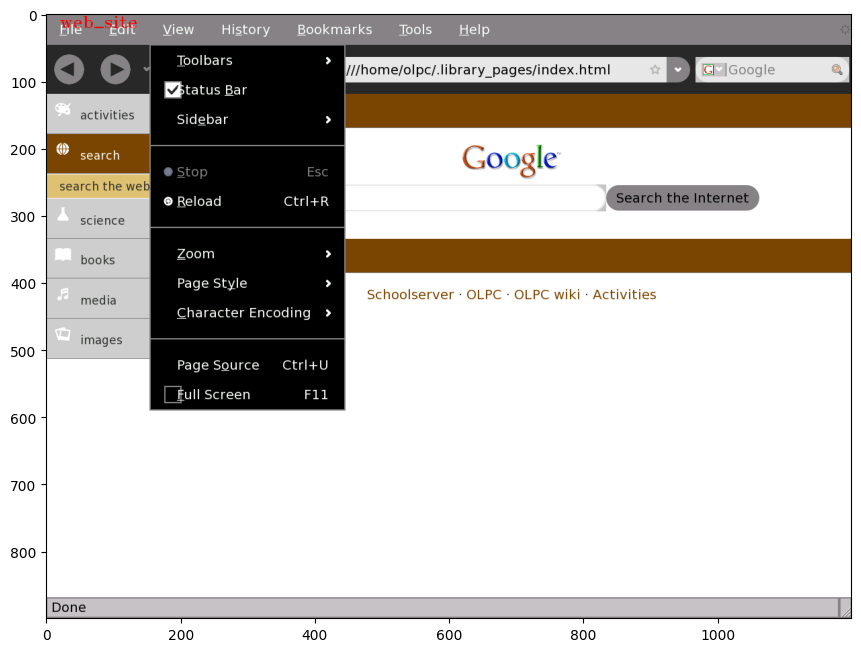

In [9]:
# show the output
# cv2.imshow("Detection Output", img_to_detect)
fig=plt.figure(figsize=(12,8), dpi= 100, facecolor='w', edgecolor='k')
plt.imshow(disp_img)
plt.show()